## Investigation and prototyping for 3rd miniproject framework

In [5]:
import numpy as np
import seaborn as sns
import scipy
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
# Read csv file
def read_csv(file_path):
    """
    Reads a CSV file and returns a pandas DataFrame.
    
    Args:
        file_path (str): Path to the CSV file.
    
    Returns:
        pd.DataFrame: DataFrame containing the data from the CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"File {file_path} is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error parsing file {file_path}.")
        return None
    except Exception as e:
        print(f"An error occurred while reading the file {file_path}: {e}")
        return None

In [ ]:
# Query: 100
csv_data = read_csv('data/data_1283.csv')
csv_data

,Unnamed: 0,A,B,C,D
0,0,0.693796,1.642787,0.013927,0.051009
1,1,4.270471,1.283215,1.350153,3.987255
2,2,4.128841,-0.444979,1.728251,5.573820
3,3,1.588009,-0.368622,-0.529406,1.956631
4,4,2.057059,0.916962,0.930465,1.140097
...,...,...,...,...,...
95,95,3.204028,0.262126,2.139913,2.941901
96,96,2.839244,-0.393678,0.659880,3.232922
97,97,1.884113,-0.056379,0.547104,2.940492
98,98,5.007837,-0.395333,0.982988,5.403170


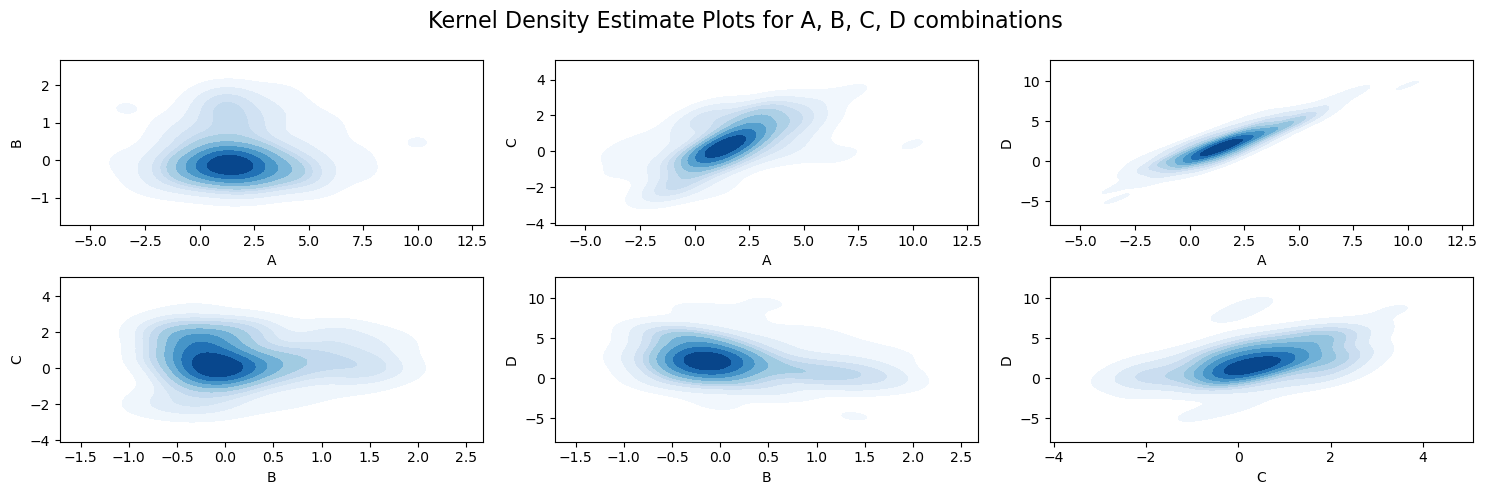

In [32]:
# Subplot for A, B, C combinations
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
sns.kdeplot(data=csv_data, x='A', y='B', fill=True, cmap='Blues', ax=axes[0, 0])
sns.kdeplot(data=csv_data, x='A', y='C', fill=True, cmap='Blues', ax=axes[0, 1])
sns.kdeplot(data=csv_data, x='A', y='D', fill=True, cmap='Blues', ax=axes[0, 2])
sns.kdeplot(data=csv_data, x='B', y='C', fill=True, cmap='Blues', ax=axes[1, 0])
sns.kdeplot(data=csv_data, x='B', y='D', fill=True, cmap='Blues', ax=axes[1, 1])
sns.kdeplot(data=csv_data, x='C', y='D', fill=True, cmap='Blues', ax=axes[1, 2])
plt.tight_layout()
plt.suptitle('Kernel Density Estimate Plots for A, B, C, D combinations', fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

A and D seem to have a very linear relationship. Maybe they are multipliers or almost multipliers, so maybe they are the variables confounded by _H.

In [ ]:
# Query: 50, A=0
csv_data_int = read_csv('data/data_1292.csv')
csv_data_int

,Unnamed: 0,A,B,C,D
0,0,0.0,0.812400,1.979295,-0.812400
1,1,0.0,-0.453206,-0.257285,0.453206
2,2,0.0,-0.043102,0.218596,0.043102
3,3,0.0,-0.788697,-0.241102,0.788697
4,4,0.0,0.795246,-0.048663,0.204754
5,5,0.0,1.672388,0.443735,-0.672388
6,6,0.0,0.984020,1.282592,0.015980
7,7,0.0,0.549753,-0.215871,-0.549753
8,8,0.0,-0.666106,-0.185130,0.666106
9,9,0.0,-0.653029,-0.721249,1.653029


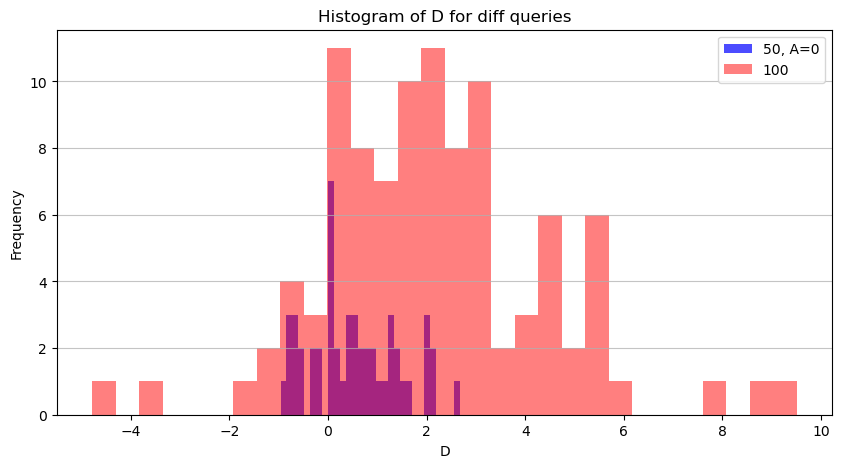

In [47]:
# Plot histogram for D superposed to previous D
plt.figure(figsize=(10, 5))
plt.hist(csv_data_int['D'], bins=30, color='blue', alpha=0.7)
plt.hist(csv_data['D'], bins=30, color='red', alpha=0.5)
plt.legend(['50, A=0', '100'])
plt.title('Histogram of D for diff queries')
plt.xlabel('D')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Plotted we can see the values the node D takes when A is not intervened on (pink), and when A is set to 0 (blue/purple). Therefore, the shrinkage in the values D takes is affected, for which we might think A and D are causally correlated.

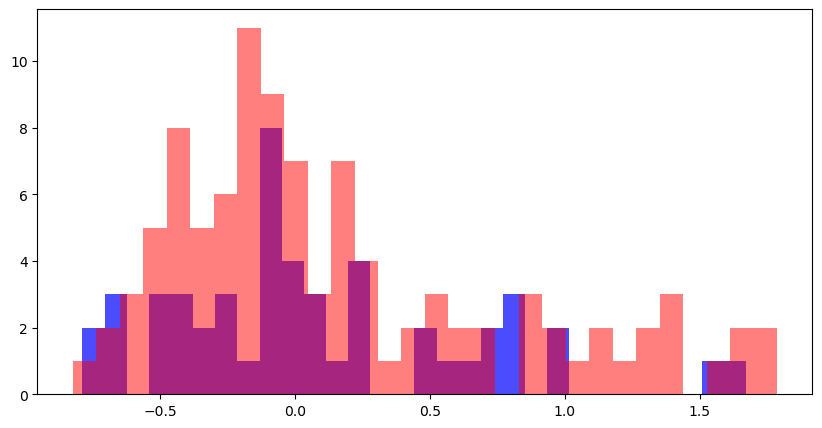

In [46]:
# Check if the distributions for the rest of the nodes have changed
plt.figure(figsize=(10, 5))
plt.hist(csv_data_int['B'], bins=30, color='blue', alpha=0.7)
plt.hist(csv_data['B'], bins=30, color='red', alpha=0.5)
plt.show()

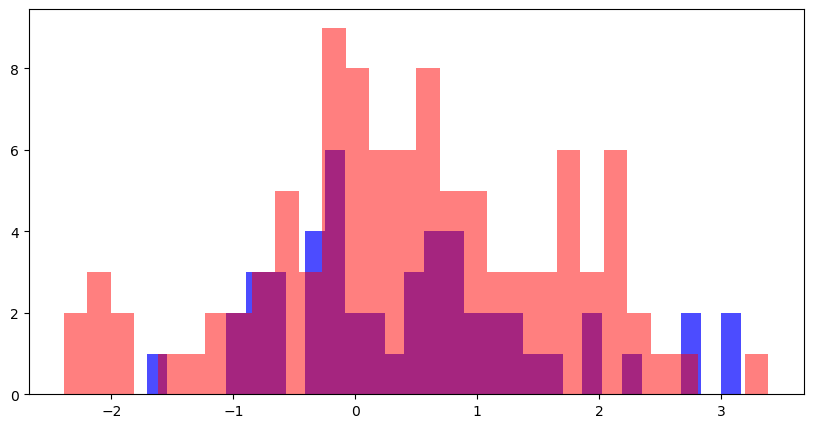

In [48]:
plt.figure(figsize=(10, 5))
plt.hist(csv_data_int['C'], bins=30, color='blue', alpha=0.7)
plt.hist(csv_data['C'], bins=30, color='red', alpha=0.5)
plt.show()

Variables B and C don't seem to be so affected. We should not look at frequency changes, since the last query only asked for half of the values of the first. The range of values variables B and C take do not seem to be extremely altered, as in the case of D.

In [49]:
# Function to take mean and variance of each column
def mean_variance(data):
    """
    Calculate the mean and variance of each column in the DataFrame.
    
    Args:
        data (pd.DataFrame): DataFrame containing the data.
    
    Returns:
        pd.DataFrame: DataFrame containing the mean and variance of each column.
    """
    mean = data.mean()
    variance = data.var()
    return pd.DataFrame({'Mean': mean, 'Variance': variance})

In [53]:
params_no_int = mean_variance(csv_data)
params_int = mean_variance(csv_data_int)
params_diff = params_no_int - params_int
params_diff

,Mean,Variance
Unnamed: 0,25.000000,629.166667
A,1.717360,4.659166
B,0.083802,0.094406
C,-0.075962,0.225915
D,1.603557,4.365166
